In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# The path to the file
file = "world.csv"
df = pd.read_csv(file)
df.head()

,Country,Year,Help,GDP,Aid,Pop,InfantMort,Employ,Ag,CO2
0,Albania,1995,Aided,2.392765e+09,180600000,3187784,12.1,52.294998,41.131387,2086.523
1,Albania,1996,Aided,3.199643e+09,226640000,3168033,12.2,51.536999,41.277372,2016.850
2,Albania,1997,Aided,2.258516e+09,168230000,3148281,12.1,52.158001,41.423358,1543.807
3,Albania,1998,Aided,2.545967e+09,268740000,3128530,12.0,51.911999,41.569343,1752.826
4,Albania,1999,Aided,3.212119e+09,488180000,3108778,11.8,51.327000,41.788321,2984.938


In [3]:
df.dtypes

Country        object
Year            int64
Help           object
GDP           float64
Aid             int64
Pop             int64
InfantMort    float64
Employ        float64
Ag            float64
CO2           float64
dtype: object

In [4]:
X = df[["Aid", "Pop", "InfantMort", "Employ", "Ag", "CO2"]]
y = df["GDP"].values.reshape(-1, 1)
print(X.shape, y.shape)

(3780, 6) (3780, 1)


Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Aid,Pop,InfantMort,Employ,Ag,CO2
631,169130000,3308233,50.1,67.352997,8.061254,234.688
1795,225290000,15147029,16.7,63.848999,78.633181,177328.786
2594,2178770000,164022627,52.3,50.491001,46.875000,146074.945
162,0,8363404,2.5,57.068001,33.658307,67502.136
2166,21870000,385287,5.5,46.459000,28.125000,2145.195


Standard Scalar

In [6]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [7]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Multiple Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Output Scoring

In [28]:
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)
coef = model.coef_[0]
#intercept = model.intercept_(X_test_scaled, y_test_scaled)

print(f"Training R2 Score: {training_score}")
print(f"Testing R2 Score: {testing_score}")
print(f"Coefficient: {coef}")
#print(f"Intercept: {intercept}")

Training R2 Score: 0.7023727662195265
Testing R2 Score: 0.7477640395051286
Coefficient: [ 0.0172525  -0.39591146 -0.04575203 -0.00138013  0.01649658  1.07218098]


Predictions

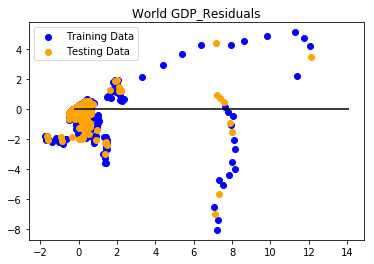

In [12]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("World GDP_Residuals")
plt.savefig("gdp.png")
plt.show()

Run labelled data against the Predictive Model

In [14]:
df_aided = df[(df["Help"] == 'Aided')]

X_aided = df_aided[["Aid", "Pop", "InfantMort", "Employ", "Ag", "CO2"]]
y_aided = df_aided["GDP"].values.reshape(-1, 1) 

In [15]:
X_aided_scaled = X_scaler.transform(X_aided)
y_aided_scaled = y_scaler.transform(y_aided)

C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [22]:
from sklearn.metrics import r2_score

predictions_aided = model.predict(X_aided_scaled)
coef_aided = model.coef_[0]

score = r2_score(y_aided_scaled, predictions_aided)
print(f"R2 Score: {score}")
print(f"Coefficients: {coef_aided}")

R2 Score: -0.9492950425128084
Coefficients: [ 0.0172525  -0.39591146 -0.04575203 -0.00138013  0.01649658  1.07218098]


Countries that did not get aid

In [17]:
df_aided = df[(df["Help"] == 'None')]

X_noaid = df_aided[["Aid", "Pop", "InfantMort", "Employ", "Ag", "CO2"]]
y_noaid = df_aided["GDP"].values.reshape(-1, 1) 

In [18]:
X_noaid_scaled = X_scaler.transform(X_noaid)
y_noaid_scaled = y_scaler.transform(y_noaid)

C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [19]:
from sklearn.metrics import r2_score

predictions_aided = model.predict(X_noaid_scaled)

score = r2_score(y_noaid_scaled, predictions_aided)
print(f"R2 Score: {score}")

R2 Score: 0.7691834481163998


Get GDP Predictions write new column for 

In [26]:
X_all = df[["Aid", "Pop", "InfantMort", "Employ", "Ag", "CO2"]]

X_all_scaled =  X_scaler.transform(X_all)

prediction_all = model.predict(X_all_scaled)

unscaled_predictions = y_scaler.inverse_transform(prediction_all)

df["GDP_Predict"] = unscaled_predictions 
df.head()

C:\Users\peta\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


,Country,Year,Help,GDP,Aid,Pop,InfantMort,Employ,Ag,CO2,GDP_Predict
0,Albania,1995,Aided,2.392765e+09,180600000,3187784,12.1,52.294998,41.131387,2086.523,1.302819e+11
1,Albania,1996,Aided,3.199643e+09,226640000,3168033,12.2,51.536999,41.277372,2016.850,1.316290e+11
2,Albania,1997,Aided,2.258516e+09,168230000,3148281,12.1,52.158001,41.423358,1543.807,1.292709e+11
3,Albania,1998,Aided,2.545967e+09,268740000,3128530,12.0,51.911999,41.569343,1752.826,1.336855e+11
4,Albania,1999,Aided,3.212119e+09,488180000,3108778,11.8,51.327000,41.788321,2984.938,1.445276e+11
5,Albania,2000,Aided,3.480355e+09,317850000,3089027,11.5,51.598999,41.751825,3021.608,1.399864e+11
6,Albania,2001,Aided,3.922099e+09,268530000,3060173,11.1,51.320000,41.569343,3223.293,1.402216e+11
7,Albania,2002,Aided,4.348070e+09,307360000,3051010,10.7,50.866001,41.605839,3751.341,1.441997e+11
8,Albania,2003,Aided,5.611492e+09,349310000,3039616,10.1,49.819000,40.912409,4294.057,1.485349e+11
9,Albania,2004,Aided,7.184681e+09,300940000,3026939,9.6,48.908001,40.948905,4165.712,1.488076e+11


Number of Countries that got Aid

In [27]:
df[(df["Help"] == 'None')].count()/21

Country        41.809524
Year           41.809524
Help           41.809524
GDP            41.809524
Aid            41.809524
Pop            41.809524
InfantMort     41.809524
Employ         41.809524
Ag             41.809524
CO2            41.809524
GDP_Predict    41.809524
dtype: float64

Number of Countries that did not get Aid

In [30]:
df[(df["Help"] == 'Aided')].count()/21

Country        138.190476
Year           138.190476
Help           138.190476
GDP            138.190476
Aid            138.190476
Pop            138.190476
InfantMort     138.190476
Employ         138.190476
Ag             138.190476
CO2            138.190476
GDP_Predict    138.190476
dtype: float64

In [31]:
df['Country'].value_counts()

Brazil                  21
Jordan                  21
Cyprus                  21
Benin                   21
Armenia                 21
Hungary                 21
Honduras                21
Kenya                   21
Eritrea                 21
Philippines             21
Samoa                   21
Singapore               21
United Kingdom          21
Mauritania              21
Equatorial Guinea       21
USA                     21
Nigeria                 21
Lebanon                 21
Comoros                 21
Cabo Verde              21
Iran                    21
Bulgaria                21
Dominican Republic      21
Kyrgyz Republic         21
Niger                   21
Cameroon                21
Tuvalu                  21
Russia                  21
Guinea-Bissau           21
United Arab Emirates    21
                        ..
Ghana                   21
Zimbabwe                21
New Zealand             21
Angola                  21
Malawi                  21
Kuwait                  21
W

Plot Model for Countries with No Aid

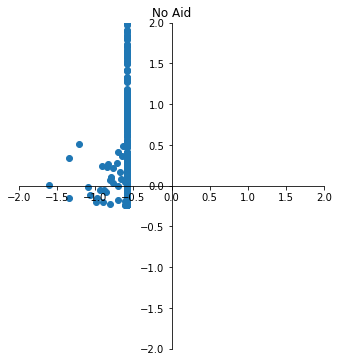

In [38]:
fig1 = plt.figure(figsize=(12, 6))
axes2 = fig1.add_subplot(1, 2, 2)
axes2.set_title("No Aid")

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes2)

axes2.scatter(X_noaid_scaled[:,0], y_noaid_scaled[:])
plt.savefig("noaid.png")

Plot Model on Countries that Received Aid

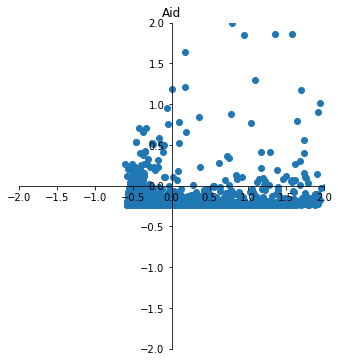

In [39]:
fig2 = plt.figure(figsize=(12, 6))
axes1 = fig2.add_subplot(1, 2, 2)
axes1.set_title("Aid")

axes1.set_xlim(-2, 2)
axes1.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)

axes1.scatter(X_aided_scaled[:,0], y_aided_scaled[:])
plt.savefig("aid.png")

In [37]:
df.to_csv("World_predicts.csv", encoding="utf-8", index=False, header=True)